In [11]:
import nibabel as nib
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt,atan2,pi,ceil,acos,sin,cos
from sklearn.metrics import hamming_loss
from skimage.exposure import equalize_hist,equalize_adapthist

from orelmisc import n_max,n_test_max,testpre,trainpre,saveCSV,shape_3d_org
from preprocess import flatten,flatten_each_sample,loadData,flatten_each_sample,precompute_and_save
from os import listdir, getcwd
from os.path import isfile, join

In [43]:
prep_ = lambda i:cap(i)
def prep(a):
  return np.array(map(prep_single,a))

percent = lambda x:"%2.1f%%"%(x*100)

prep_single = lambda xs:map(prep_,xs)

cap = lambda p: 0 if p < 0.5 else 1

y = np.zeros((n_max,3))
# gender: 1 = female, 0 = male
# age: 1 = young, 0 = old
# health: 1 = healthy, 0 = sick
y_gender = [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y_age = [1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y_health = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y[:,0] = np.array(y_gender)
y[:,1] = np.array(y_age)
y[:,2] = np.array(y_health)

result = None
xa = 0
x = None
x_t = None
TO_RADIANS = pi/180

In [44]:
space = 15 # 35,50,70,100,150
hSize = space-1
bins = np.linspace(1,1700,space)
#bins = np.linspace(0,1,space)
sbins = bins[:-1]+1800/space/2

r_division = 8
theta_division = 8
phi_division = 8
# radius form 0 to 80
# theta from 0 to 180
# phi from 0 to 360
rMax = 80
tMin = 30
tMax = 180-tMin
Ncomps = 40

ranges = [1,r_division,theta_division,phi_division]
nBlocks = r_division*theta_division*phi_division
fnameSpherical = "spherical_every2.npy"
xSpherical = np.load(fnameSpherical)
computeAvailiableFiles()

bSize = hSize+2 # bsize means blockSize
ds = nBlocks*bSize # Ncomps # sum,sum2,sum3,avg,var,mode, numper of percentiles and histograms
iHist = 0
idxHist = lambda i: iHist+i*bSize
idxsFor = lambda i,many: np.array(range(idxHist(i)+hSize,idxHist(i)+hSize+many))

blockNr2Pos = np.zeros((nBlocks,3))

verboseIdx = lambda i: ["Block #",i/bSize," at",blockNr2Pos[i/bSize],"isHist:",i%bSize<hSize," and bin",i%bSize," or stat",i%bSize-hSize]

print "Number of Blocks:",nBlocks
print "Size of Histograms:",hSize
print "Numbers per Block:",bSize
print "Dimensions: ca.",ds

def spherical2cart(r,theta,phi):
  return (r*sin(theta)*cos(phi),r*sin(theta)*sin(phi),r*cos(theta))

fromtoSpherical = lambda di,sph: zip(np.round(np.linspace(0,sph.shape[di],ranges[di]+1)),np.round(np.linspace(0,sph.shape[di],ranges[di]+1))[1:])

fromto = lambda di,sph: zip(np.round(np.linspace(0,sph.shape[di],ranges[di]+1)),np.round(np.linspace(0,sph.shape[di],ranges[di]+1))[1:])

from skimage.filters import sobel
# "xTransformed.npy"
fname = "histsSize%s_stats_nBlocks%s_bSize%s_divs_%s_%s_%s.npy" % (hSize,nBlocks,bSize,r_division,theta_division,phi_division)
name = "output/%s" % fname[:-4]


def loadAndPreprocess():
    global d_org,x,x_t,xa,x_org,x_t_org,xa_org,xSpherical
    
    xa = np.zeros((n_max+n_test_max,ds))
    #xSpherical = np.zeros((n_max+n_test_max,rMax/2+1,(tMax-tMin)/2+1,360/2+1))
    
    i = 0
    #print "===== Calculate spherical coordiantes ===="
    iD = i
    diff = 1
    max_diff = 45
    while i < n_max+n_test_max:
      if i > iD+min(diff,max_diff):
        print "  i = %s ... %.1f%%" % (i,float(i)/(n_max+n_test_max)*100)
        diff = 2*diff
        iD = i
      
      #n_i,pre,t_str = (n_max,"set_train/","train") if i < n_max else (n_test_max,"set_test/","test")
      #filename = "%s%s_%s.nii" % (pre,t_str,i%n_max+1)
      #Xtotal,Ytotal,Ztotal = (176,208,176)
      #data = nib.load(filename).get_data().reshape((Xtotal,Ytotal,Ztotal))
      #data = data[35:130,40:150,10:100]

      # calculate histograms: 8*4*8 = 256 histograms
      hCount = 0
      i0=0
      for l,u in fromto(1,xSpherical):
        l0,u0=(int(l),int(u))
        i1=0
        for l,u in fromto(2,xSpherical):
          l1,u1=(int(l),int(u))
          i2=0
          for l,u in fromto(3,xSpherical):
            l2,u2=(int(l),int(u))
            
            blockNr2Pos[hCount] = [i0,i1,i2]
            
            cut = xSpherical[i,l0:u0,l1:u1,l2:u2]
            #cut = equalize_hist(cut)
            #sb = sobel(np.max(cut,axis=2))
            h=np.histogram(cut.ravel(),bins=bins)[0]
            xa[i,idxHist(hCount):(idxHist(hCount)+hSize)] = h
            #k0,k1,k2 = cut.shape
            #pos = np.arange(k0).reshape((k0,1,1)) + np.arange(k1).reshape((1,k1,1)) + np.arange(k2).reshape((1,1,k2))
            #pos2 = pos*pos
            avg = np.average(cut)
            std = np.std(cut)
            xa[i,idxsFor(hCount,2)] = [avg,std]
            #xa[i,idxsFor(hCount,2)+2] = [np.sum(pos*cut),np.sum(pos2*cut)]
            #xa[i,idxsFor(hCount,2)+4] = [np.average(sb),np.std(sb)/np.average(sb)]
            hCount = hCount + 1
            i2 = i2+1
          i1 = i1+1
        i0 = i0+1
      i = i+1
    
    np.save(fname,xa)
    print "======= Saved data matrix xa into %s =========" % fname
    
    #np.save(fnameSpherical,xSpherical)
    #print "======= Saved spherical coordinates into %s =========" % fnameSpherical

# switch to preprocess by setting True
if False:
  loadAndPreprocess()

xa = np.load(fname)
x,x_t = (xa[0:n_max,:],xa[n_max:,:])

print "Example:",xa[0,:20],"..."

Number of Blocks: 512
Size of Histograms: 14
Numbers per Block: 16
Dimensions: ca. 8192
Example: [   0.            0.           37.           28.          462.            3.
   45.          143.           64.           93.          268.            7.
    0.            0.          842.89913043  313.06656925    0.            0.
    1.            0.        ] ...


In [45]:
fname

'histsSize14_stats_nBlocks512_bSize16_divs_8_8_8.npy'

In [26]:
if False:
  i = 413
  for it,theta in enumerate(np.linspace(0,xSpherical[i].shape[1]-1,6)):
    print theta,("<","="*10) if 3<=it<5 else ""
    c = np.array(xSpherical[i,:,theta,:],copy=True)
    plt.imshow(c, cmap="gray", origin="lower")
    plt.show()

In [27]:
from sklearn.model_selection import train_test_split

# xa. all data
# x. public training data
# y. public training targets
# x_t public to be predicted data

b = [0,1]
types = [ [a1,a2,a3] for a1 in b for a2 in b for a3 in b if not (a2 is 1 and a3 is 0)]
Ntypes = len(types)

def get_by(t,ys):
    idxs = range(0,len(ys))
    return filter(lambda i:list(ys[i,:])==list(t),idxs)

#indices for splitting
typeIdxs = np.array([get_by(t,y) for t in types])
ratios = [float(len(i))/n_max for i in typeIdxs]

def show_diff_for(name,es1,es2,total):
  print es1,es2
  es = map(lambda x,y:x-y,es1,es2)
  abses = map(abs,es)
  print name,"contains",sum(abses)/2,"samples of total",total,": %0.2f%%" % (100*float(sum(abses))/total)
  for i in range(0,len(es1)):
      tp = ((100*float(es[i])/total),types[i],es[i])
      print "  %0.2f%%: %s with samples: #%s" % tp

def show_diff(name,es1,es2):
  es1 = map(len,es1)
  es2 = map(len,es2)
  show_diff_for(name,es1,es2,total=sum(es1))

def show_for(name,es):
  es1 = map(len,es)
  show_diff_for(name,es1,[0]*len(es1),sum(es1))

# The procedure will add so many nonClass samples to the split, until at least 30% don't belong to any class
# for None, this doSplit returns a tuple of elements.
# for the other arguments, doSplit list of such tuples
def doSplit(test_size=0.25,rs=1,show=False):
  
  def mkTuple(ttr,tts,lastIsNil,classes):
    ys = lambda i: [classes[i] if i < 2 else -1]
    return (ttr,tts,
             np.vstack([x[idxs] for idxs in ttr]),
             np.vstack([x[idxs] for idxs in tts]),
             np.vstack([(len(idxs)*[(ys(i))] if (lastIsNil) else y[idxs]) for i,idxs in enumerate(ttr)]),
             np.vstack([(len(idxs)*[(ys(i))] if (lastIsNil) else y[idxs]) for i,idxs in enumerate(tts)]) )
  
  typeIdxsTR = []
  typeIdxsTS = []
  for i in range(0,Ntypes):
      atr,ats,_,_ = train_test_split(typeIdxs[i],np.zeros(len(typeIdxs[i])),test_size=test_size,random_state=rs)
      typeIdxsTR.append(atr)
      typeIdxsTS.append(ats)
  typeIdxsTR = np.array(typeIdxsTR)
  typeIdxsTS = np.array(typeIdxsTS)
  # gender: 1 = female, 0 = male
  # age: 1 = young, 0 = old
  # health: 1 = healthy, 0 = sick
  if show:
    show_for("public Training",typeIdxs)
    show_for("our Training",typeIdxsTR)
    show_for("our Test",typeIdxsTS)
  return mkTuple(typeIdxsTR,typeIdxsTS,False,None)

# [0,1,1] => [0,0,0,1,0,0,0,0]
def binary2monadic(y):
  ys = np.zeros((len(y),1))
  for i,yi in enumerate(y):
    # ys[i,int(yi[0]*4+yi[1]*2+yi[2])] = 1
    ys[i] = int(list(types).index(list(yi)))
  return ys

convertInt = lambda i:types[i]
#convertInt = lambda i:map(lambda x: 1 if int(x) is not 0 else 0,[int(i)&4,int(i)&2,int(i)&1])

def monadic2binary(y):
  #return np.array([convertInt(list(yi).index(1)) for yi in y])
  return np.array([convertInt(yi) for yi in y])

def continousMonadic2binary(y):
  ys = np.zeros((len(y),3))
  for i,yi in enumerate(y):
    ys[i] = convertInt(np.argmax(yi))
  return ys

print "Class representation"
r = map(lambda x:int(x*100),ratios)
for i in range(0,6):
  print types[i],("%2.1f%%"%r[i]),(r[i]*"=")

Class representation
[0, 0, 0] 10.0% ==========
[0, 0, 1] 6.0% ======
[0, 1, 1] 22.0% ======================
[1, 0, 0] 14.0% ==============
[1, 0, 1] 17.0% =================
[1, 1, 1] 29.0% =============================


In [28]:
if False:
  doSplit(show=True,test_size=0.3,rs=1)

In [40]:
def visualize(labelName,y_pred,model,prefix):
  total = int(len(y_pred)*0.7)
  zeros = int(len(filter(lambda x:x == 0,y_pred))*0.7)
  print labelName," ","0"*zeros,"#","1"*(total-zeros),"***"

def savePrediction(ys,prefix):
    savedFilename = saveCSV(ys,prefix)
    print("Saved predictions into %s" % savedFilename)

def applyClassification(model,label,uni=False,split=None):
  (_,_,xtr,xts,ytr,yts) = split
  if label is None:
    get_label = lambda ys: ys
  else:
    get_label = lambda ys: ys[:,label]
  
  # processing line
  xtr1 = np.array(xtr,copy=True)
  xtrAvg = np.average(xtr,axis=0)
  xtrStdDev = np.std(xtr,axis=0)
  xtr1 = (xtr1 - xtrAvg)/(xtrStdDev+0.00001)
  ytr_pred = model.fit(xtr1,get_label(ytr)).predict_proba(xtr1) if uni and "predict_proba" in dir(model) else model.fit(xtr1,get_label(ytr)).predict(xtr1)
  
  def predict(xData):
    xData2 = np.array(xData,copy=True)
    xData2 = (xData - xtrAvg)/(xtrStdDev+0.00001)
    yPred = model.predict_proba(xData2) if uni and "predict_proba" in dir(model) else model.predict(xData2)
    return yPred
  
  yts_pred = predict(xts)
  y_t_pred = predict(x_t)
  
  if not uni:
    #y_t_pp = prep_single(y_t_pred)
    yts_pp = prep_single(yts_pred)
    ytr_pp = prep_single(ytr_pred)

    trCorrect = len(filter(lambda x:x,map(lambda x,y:x==y,get_label(ytr),ytr_pp)))
    tsCorrect = len(filter(lambda x:x,map(lambda x,y:x==y,get_label(yts),yts_pp)))
    ltr = 100*hamming_loss(get_label(ytr),ytr_pp)
    lts = 100*hamming_loss(get_label(yts),yts_pp)

    print "|   %3d    /    %3d    |   %3d   /     %3d    |    %3.1f%%     |     %3.1f%%     |" % (trCorrect,len(xtr)-trCorrect,tsCorrect,len(xts)-tsCorrect,ltr,lts)
  else:
    ltr,lts = (0,0)
    
  return model,ltr,lts,ytr_pred,yts_pred,y_t_pred,predict

import random

def applyClassificationSeparated(classf,uni,trs,test_size,n_splits):
  prefix = classf[0]
  # TODO: copy output to file
  
  doPrep = lambda xs: prep(xs)
  
  print "### Prediction with ###\n","  ",prefix,"\n"
  
  results = []
  
  #using a random_state for the test case splitting. it needs to be different for each split, thus the index of
  # the split is added to a factor of the trs. for different values of trs (0,1,2,...) it will produce very different splits
  splits = [doSplit(test_size=test_size,rs=i+30*trs) for i in range(0,n_splits)]
  
  print "| Predictions training | Predictions test     | Hamming Loss | Hamming Loss |"
  print "|  correct / incorrect | correct / incorrect  |   Training   |    Test      |"
  
  for i,splitO in enumerate(splits):
    print "============== SPLIT # %s # ================" % i
    
    splitss = [splitO]
    
    subClassResults = []
    for j,split in enumerate(splitss):
      _,_,_,_,ytr,yts = split
      model1,ltr1,lts1,ytr_pred1,yts_pred1,y_t_pred1,prdt1 = applyClassification(classf[1],0,split=split)
      model2,ltr2,lts2,ytr_pred2,yts_pred2,y_t_pred2,prdt2 = applyClassification(classf[1],1,split=split)
      model3,ltr3,lts3,ytr_pred3,yts_pred3,y_t_pred3,prdt3 = applyClassification(classf[1],2,split=split)

      ytr_pred_real = np.array([ytr_pred1,ytr_pred2,ytr_pred3]).transpose()
      yts_pred_real = np.array([yts_pred1,yts_pred2,yts_pred3]).transpose()
      y_t_pred_real = np.array([y_t_pred1,y_t_pred2,y_t_pred3]).transpose()

      def predictor(xData):
        lb1 = prdt1(xData)
        lb2 = prdt2(xData)
        lb3 = prdt3(xData)
        ys = np.array([lb1,lb2,lb3]).transpose()
        return ys

      models = [model1,model2,model3]
      
      y_pred_T = doPrep(y_t_pred_real)
      y_pred_tr = doPrep(ytr_pred_real)
      y_pred_ts = doPrep(yts_pred_real)
      y_t_pred = y_pred_T
      ltr = 100*hamming_loss(ytr,y_pred_tr)
      lts = 100*hamming_loss(yts,y_pred_ts)
    
    print "|                     Total                   |    %3.1f%%     | >>  %3.1f%%  << |" % (ltr,lts)

    results.append([y_t_pred,[ytr_pred_real,yts_pred_real,y_t_pred_real],y_pred_ts,ltr,lts,models,predictor])
    
  return results

In [41]:
def doStuff(feats=0.3,rs=0,
            preprocess=None,uni=False,test_size=0.25,n_splits=5,
            trs=0,kernel="rbf",coef0=1,deg=3,gamma=1.0/600,C=80,n_comps=15,f=0.5):
  
  print "Number of Blocks:",nBlocks
  print "Size of Histograms:",hSize
  print "Numbers per Block:",bSize
  print "Dimensions: ca.",ds
  
  prefix = "%s_kSVM_kernel%s_C%s_def%s_coef0_%s_rs%s"%(name,kernel,C,deg,coef0,rs)
  model = SVC(kernel=kernel,C=C,degree=deg,coef0=coef0,random_state=rs,probability=True)
  
  prefix = prefix + "_OVO"
  model = OneVsOneClassifier(model,n_jobs=-1)
    
  prefix = "%s_TEST_SIZE%s_n%s_trs%s" % (prefix,test_size,n_splits,trs)
  
  # results = [(y_pred_T,[ytr_pred_real,yts_pred_real,y_t_pred_real],y_pred_ts,ltr,lts,models),...]
  results = applyClassificationSeparated((prefix,model),uni=uni,test_size=test_size,trs=trs,n_splits=n_splits)
  # compute average predictions:
  yt_real = np.average([r[1][2] for r in results],axis=0)
  
  ltravg = np.average([r[3] for r in results],axis=0)
  ltsavg = np.average([r[4] for r in results],axis=0)
  ltrstd = np.std([r[3] for r in results],axis=0)*n_splits/(n_splits-1) # empirical std, estimation
  ltsstd = np.std([r[4] for r in results],axis=0)*n_splits/(n_splits-1)
  
  y_pred_T = prep(yt_real)

  print "\n### ltr %2.1f%% (+/- %2.2f) | ===== lts %2.1f%% (+/- %2.2f) ==== ###\n" % (ltravg,ltrstd,ltsavg,ltsstd)
  
  prefix = "%s_ltsavg%.3f_ltsstd%.3f"%(prefix,ltsavg/100,ltsstd/100)
  
  models = results[-1][5]
  
  if uni:
    models = [models,models,models]
  visualize("Gender",y_pred_T[:,0],models[0],prefix=prefix)
  visualize("Age   ",y_pred_T[:,1],models[1],prefix=prefix)
  visualize("Health",y_pred_T[:,2],models[2],prefix=prefix)
  
  #
  #nsp = np.array([m.n_support_ for s in results for m in (s[5].estimators_ if uni else [k for i in s[5] for k in i.estimators_])])
  #print "# Support Vectors: %s" % nsp.ravel()
    
  # Plot 3D:
  fig = plt.figure(figsize=(10,5))
  
  ax = fig.add_subplot(221, projection='3d')
  ns = lambda x,n: np.random.random((n))*0.35
  xs = y[:,0]+ns(0,n_max)
  ax.scatter(xs, y[:,1]+ns(0,n_max), y[:,2]+ns(0,n_max),c=xs)
  ax.set_xlabel('Gender')
  ax.set_ylabel('Age')
  ax.set_zlabel('Health')
  ax.set_title("Training distribution")
  ax.view_init(azim=20)

  ax = fig.add_subplot(223, projection='3d')
  xs = yt_real[:,0]
  ax.scatter(xs, yt_real[:,1]+ns(0,n_test_max), yt_real[:,2]+ns(0,n_test_max),c=xs)
  ax.set_xlabel('Gender')
  ax.set_ylabel('Age')
  ax.set_zlabel('Health')
  ax.set_title("Public Test predictions")
  ax.view_init(azim=20)

  ax = fig.add_subplot(224, projection='3d')
  xs = y_pred_T[:,0]+ns(0,n_test_max)
  ax.scatter(xs, y_pred_T[:,1]+ns(0,n_test_max), y_pred_T[:,2]+ns(0,n_test_max),c=xs)
  ax.set_xlabel('Gender')
  ax.set_ylabel('Age')
  ax.set_zlabel('Health')
  ax.view_init(azim=20)
  ax.set_title("Public Test finalized")
  fig.savefig(prefix+"_3D.png")
  plt.show()
  
  savePrediction(y_pred_T,prefix)
  
  result = {
    "res":results,
    "ltrs":[r[3] for r in results],
    "ltss":[r[4] for r in results],
    "ltsavg":ltsavg,
    "ltsstd":ltsstd
  }
  return result

Number of Blocks: 512
Size of Histograms: 14
Numbers per Block: 16
Dimensions: ca. 8192
### Prediction with ###
   output/histsSize14_stats_nBlocks512_bSize16_divs_8_8_8_kSVM_kernelpoly_C5.0_def2_coef0_1_rs0_OVO_TEST_SIZE0.2_n10_trs1 

| Predictions training | Predictions test     | Hamming Loss | Hamming Loss |
|  correct / incorrect | correct / incorrect  |   Training   |    Test      |
============== SPLIT # 0 # ================
|   220    /      0    |    53   /       5    |    0.0%     |     8.6%     |
|   220    /      0    |    56   /       2    |    0.0%     |     3.4%     |
|   220    /      0    |    49   /       9    |    0.0%     |     15.5%     |
|                     Total                   |    0.0%     | >>  9.2%  << |
============== SPLIT # 1 # ================
|   220    /      0    |    50   /       8    |    0.0%     |     13.8%     |
|   220    /      0    |    54   /       4    |    0.0%     |     6.9%     |
|   220    /      0    |    49   /       9    |    0.0% 

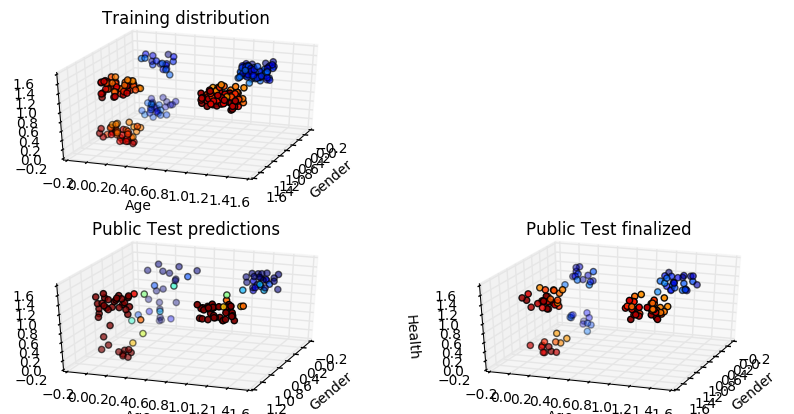

Saved predictions into output/histsSize14_stats_nBlocks512_bSize16_divs_8_8_8_kSVM_kernelpoly_C5.0_def2_coef0_1_rs0_OVO_TEST_SIZE0.2_n10_trs1_ltsavg0.111_ltsstd0.013.csv


In [42]:
result = doStuff(
  preprocess=None,
  # One-vs-One with Kernel Support Vector Machines.
  uni = False,kernel="poly",gamma=0.01/2,coef0=1,deg=2,C=5e0,rs=0,     # oooh! stable, 13% public
  test_size=0.2,n_splits=10,trs=1)